<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/TimeSeries_MA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an example for a MA (Moving Average) model. <br>
I was not able to find a pure MA dataset. So I decided to generate some simulated data for this model.<br>
<br><br>
---

Written by: Arjang Fahim <br>
Date: 1/10/2022 <br>
Last update: 1/10/2022

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

# Generating synthetic data

$y_t = 50 + 0.4 $𝜺<sub>t-1</sub> + 0.3 𝜺<sub>t-2</sub> + 𝜺<sub>t</sub>

𝜺<sub>t</sub> ~ N(0,1)


In [21]:
errors = np.random.normal(0, 1, 400)

In [22]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [23]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [24]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

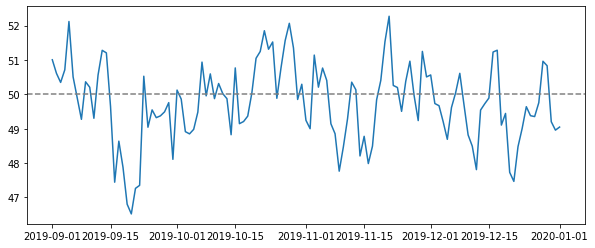

In [25]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [26]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

# ACF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


<BarContainer object of 10 artists>

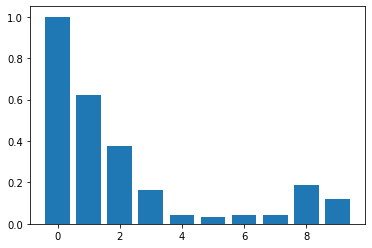

In [27]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

# PACF

<BarContainer object of 25 artists>

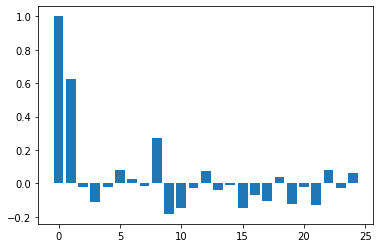

In [28]:
pacf_vals = pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

# Get training and testing sets

In [29]:
# We predict only two days, because our model is MA(2)
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

# Fit ARIMA Model

In [30]:
#create the model, MA(2) process
model = ARIMA(train_data, order=(0,0,2))

In [31]:
#fit the model
model_fit = model.fit()

In [32]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -160.669
Method:                       css-mle   S.D. of innovations              0.911
Date:                Tue, 31 May 2022   AIC                            329.339
Time:                        06:28:33   BIC                            340.522
Sample:                    09-01-2019   HQIC                           333.881
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7660      0.157    317.536      0.000      49.459      50.073
ma.L1.y        0.5319      0.088      6.076      0.000       0.360       0.704
ma.L2.y        0.3704      0.118      3.130      0.0

# Predicted Model:

The below equation is based on the result of the trainig and can be used for the future usage:<br>
$\hat{y_t}$ = 49.76 + 0.53 $𝜺_{t-1}$ + 0.37 $𝜺_{t-2}$

In [33]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [34]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [35]:
residuals = test_data - predictions

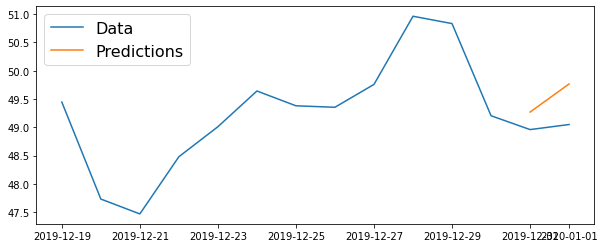

In [36]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [37]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0105


In [38]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.5528520957521912
